**Overview**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
<br><br>

<b> Problem Statement <br>
 After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. <br><br>
 Our main task is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. by following the approach of clustering and form the cluster of countries. </b>
 <br> <br>
The steps which we will follow are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and recommendations

# 1. Read and understand,visualize the data

In [22]:
# Impoting the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [85]:
# read the dataset
data_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [86]:
# basics of the df
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [87]:
# Shape of the DF
data_df.shape

(167, 10)

In [88]:
# To get actual values.
data_df['exports'] = (data_df['exports']*data_df['gdpp'])/100
data_df['imports'] = (data_df['imports']*data_df['gdpp'])/100
data_df['health'] = (data_df['health']*data_df['gdpp'])/100


In [89]:
# Now the Updated Dataset is :
data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


# 2. Clean the data

In [90]:
# Description of the Dataset
data_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1056.7332,6588.3521,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,17973.8858,1801.4089,14710.8104,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,183750.0000,8663.6000,149100.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [92]:
# missing values
round(100*(data_df.isnull().sum())/len(data_df), 2)

country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

### No Missing Values in the Dataset

## Visualization :

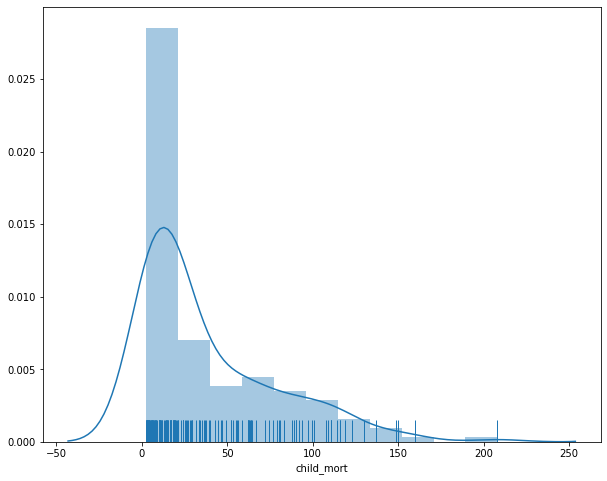

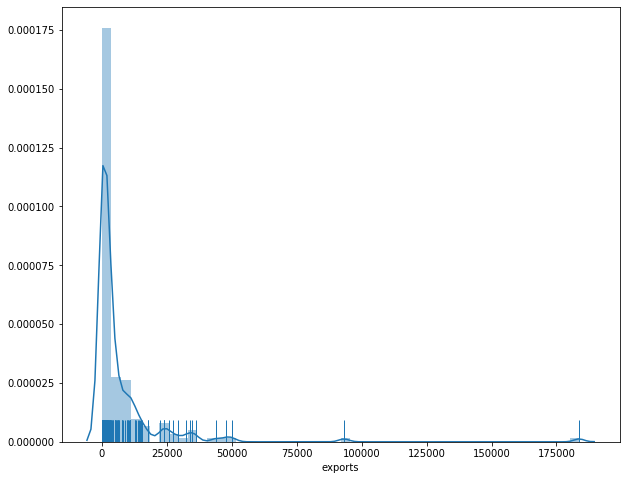

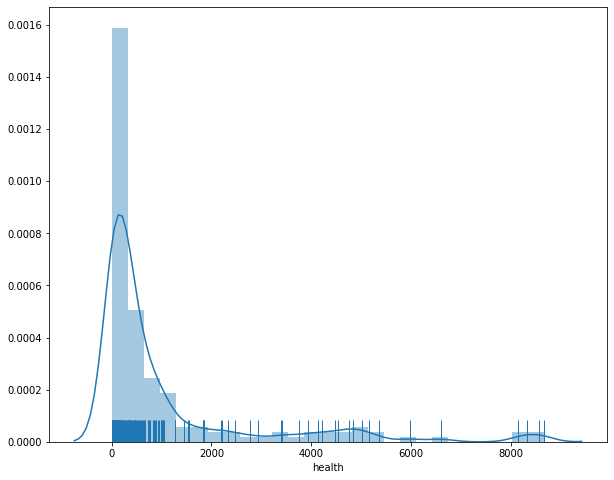

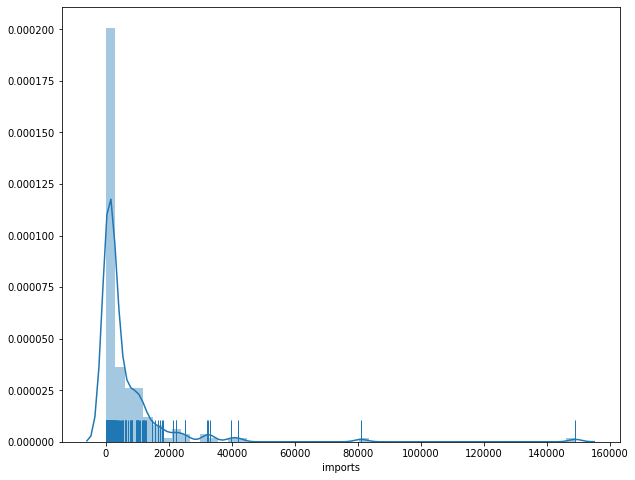

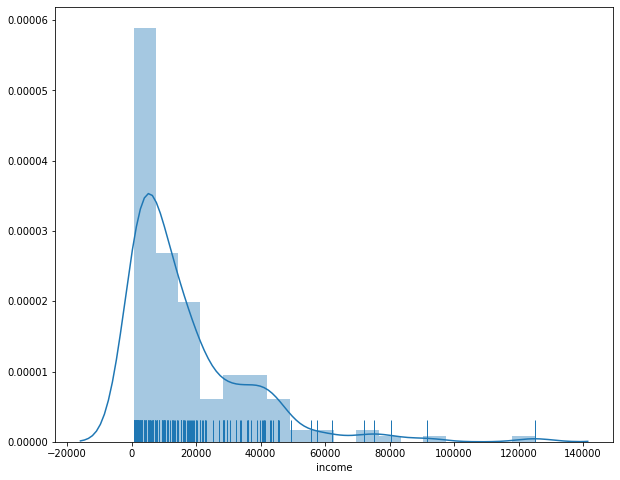

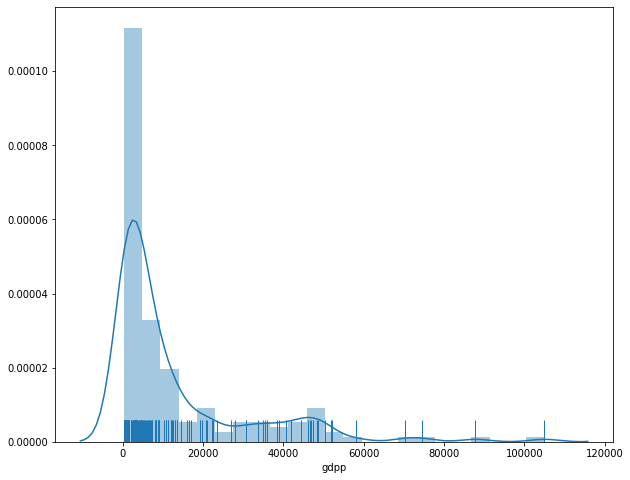

In [93]:
# Univirate Analysis

plt.figure(figsize = (10,8))
sns.distplot(data_df['child_mort'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(data_df['exports'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(data_df['health'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(data_df['imports'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(data_df['income'][:200], rug=True,hist=True)
plt.show()
plt.figure(figsize = (10,8))
sns.distplot(data_df['gdpp'][:200], rug=True,hist=True)
plt.show()


# Bivirate Analysis

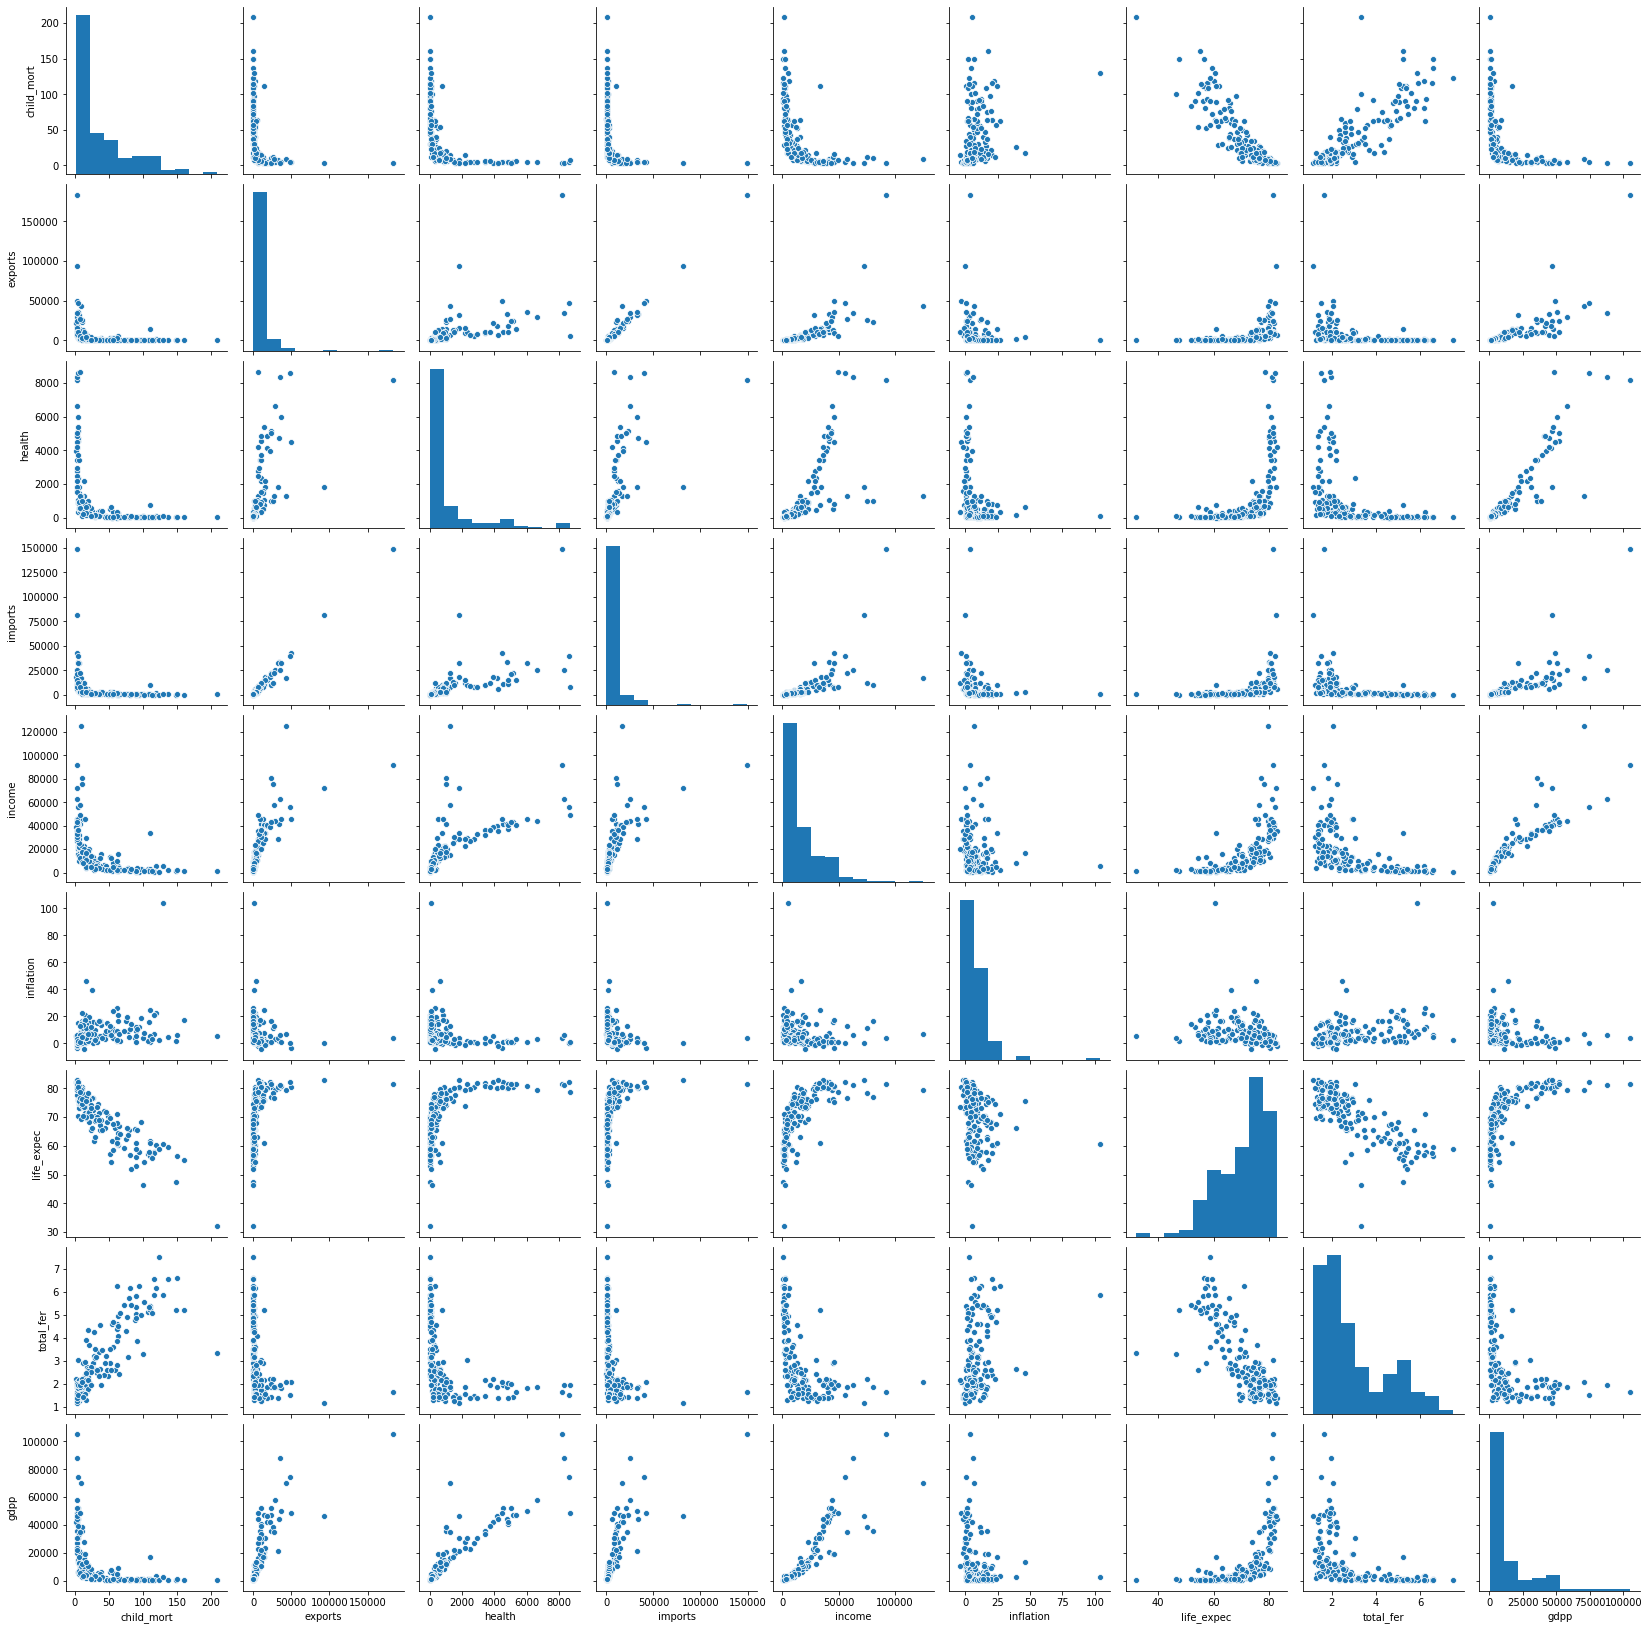

In [94]:
### Let's make a pairplot of all the numeric variables

sns.pairplot(data_df)
plt.show()

In [95]:
data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


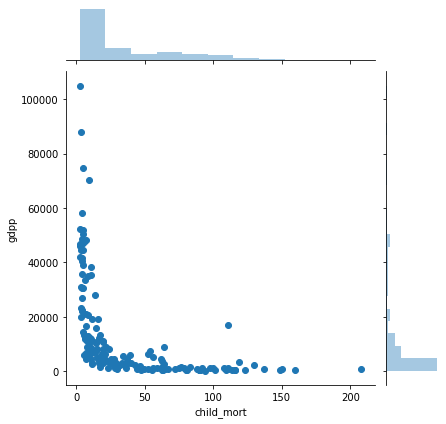

In [96]:
sns.jointplot('child_mort', 'gdpp', data_df)
plt.show()


In [97]:
data_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Outlier Treatment

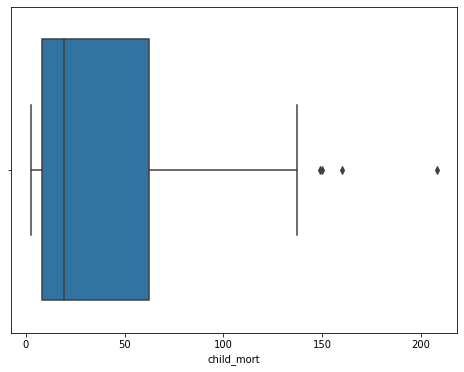

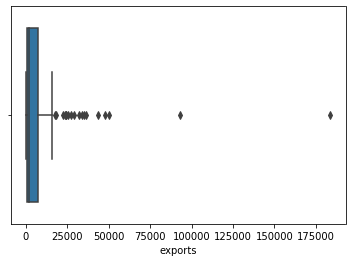

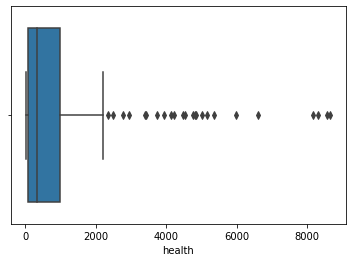

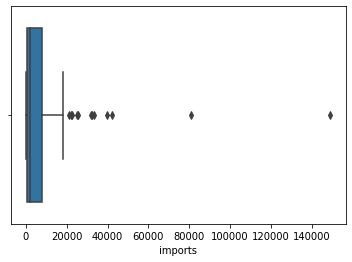

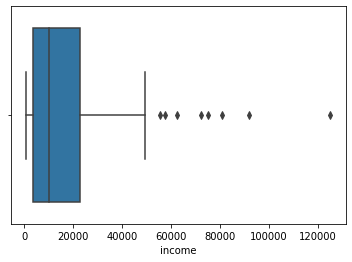

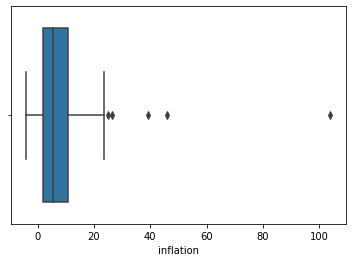

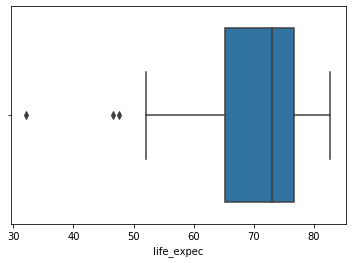

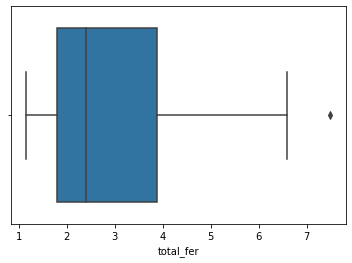

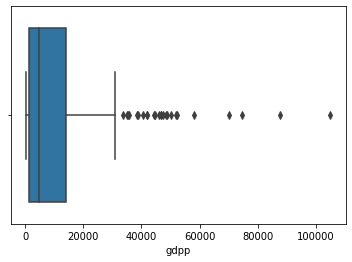

In [98]:
# Ploting Box Plot to undersatnd the outliers

plt.figure(figsize = (8,6))
feature = country_df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
for i in feature:
    sns.boxplot(data_df[i])
    plt.show()  

In [99]:
# Getting statistical data for outlier treatment

data_df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1056.7332,6588.3521,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,17973.8858,1801.4089,14710.8104,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,183750.0000,8663.6000,149100.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [101]:
# exports 

q4 = round(data_df['exports'].quantile(0.99),2)
print(q4)

data_df['exports'][data_df['exports']>= q4] = q4

64794.26


C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# health

q4 = round(data_df['health'].quantile(0.99),2)
print(q4)

data_df['health'][data_df['health']>= q4] = q4

8410.33


C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
# imports

q4 = round(data_df['imports'].quantile(0.99),2)
print(q4)

data_df['imports'][data_df['imports']>= q4] = q4

55371.39


C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
# inflation

q4 = round(data_df['inflation'].quantile(0.99),2)
print(q4)

data_df['inflation'][data_df['inflation']>= q4] = q4

41.48


C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
# income 

q4 = int(data_df['income'].quantile(0.99))
print(q4)

data_df['income'][data_df['income']>= q4] = q4

84374


C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
# gdpp 

q4 = int(data_df['gdpp'].quantile(0.99))
print(q4)

data_df['gdpp'][data_df['gdpp']>= q4] = q4

79088


C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
# Changes to the data after Capping

data_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,6538.2148,1056.7332,5873.1352,16857.5509,7.3810,70.5557,2.9480,12756.8263
std,40.3289,11415.3086,1801.4089,9422.7009,17957.0129,7.7933,8.8932,1.5138,17430.2089
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,64794.2600,8663.6000,55371.3900,84374.0000,41.4800,82.8000,7.4900,79088.0000


## Clustering - Hopkins Check

In [107]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [108]:
for i in range(10):
    print("Hopikins value is:" , hopkins(data_df.drop('country', axis=1)))

Hopikins value is: 0.9047805014254523
Hopikins value is: 0.9378629782193588
Hopikins value is: 0.9351273452220409
Hopikins value is: 0.9455921000498024
Hopikins value is: 0.9289662998027994
Hopikins value is: 0.8347431974488025
Hopikins value is: 0.8526787134136761
Hopikins value is: 0.9447152412815903
Hopikins value is: 0.9317231238114501
Hopikins value is: 0.9047710564761106


In [109]:
# Avg of Hopkins Score
from statistics import mean 

Avg = [0.9500754538555459 , 0.8666744517048157 , 0.7862774294809987 , 0.9556062311416169 
,0.9072226209892769 , 0.8471494847597351 , 0.9163444213305411 , 0.91522518739998 ,0.840272205871473]

Mean = mean(Avg)
print(round(Mean,2))



0.89


### Scaling

In [110]:
# Creating a Copy of original DataSet

data_df_final = data_df.copy()

In [111]:
data_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [112]:
# creating a scaler object and fitting it to the dataset and ignoring the 'country' column for now
# Basically Standardization
scaler = StandardScaler()
df1 = scaler.fit_transform(data_df_final.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56962212, -0.56503989, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399973, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55059641, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [113]:
# Now converting it to a DataFrame

df1 = pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8
0,1.2915,-0.5696,-0.5650,-0.5987,-0.8517,0.2650,-1.6191,1.9029,-0.7023
1,-0.5389,-0.4739,-0.4392,-0.4136,-0.3869,-0.3721,0.6479,-0.8600,-0.4987
2,-0.2728,-0.4240,-0.4848,-0.4761,-0.2211,1.1221,0.6704,-0.0384,-0.4774
3,2.0078,-0.3812,-0.5324,-0.4640,-0.6120,1.9330,-1.1792,2.1282,-0.5310
4,-0.6956,-0.0867,-0.1788,0.1397,0.1253,-0.7646,0.7043,-0.5419,-0.0320


In [114]:
# Allocating headers as columns names to the DataFrame
df1.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.5696,-0.5650,-0.5987,-0.8517,0.2650,-1.6191,1.9029,-0.7023
1,-0.5389,-0.4739,-0.4392,-0.4136,-0.3869,-0.3721,0.6479,-0.8600,-0.4987
2,-0.2728,-0.4240,-0.4848,-0.4761,-0.2211,1.1221,0.6704,-0.0384,-0.4774
3,2.0078,-0.3812,-0.5324,-0.4640,-0.6120,1.9330,-1.1792,2.1282,-0.5310
4,-0.6956,-0.0867,-0.1788,0.1397,0.1253,-0.7646,0.7043,-0.5419,-0.0320


In [115]:
# Making data more intuitive

pd.options.display.float_format='{:.4f}'.format
df1.describe()

# df1 is the scaled dataset which we will be using it for further analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030
min,-0.8871,-0.5744,-0.5812,-0.6251,-0.9076,-1.4918,-4.3372,-1.1913,-0.7208
25%,-0.7466,-0.5352,-0.5447,-0.5570,-0.7542,-0.7170,-0.5928,-0.7639,-0.6575
50%,-0.4718,-0.4183,-0.4092,-0.4074,-0.3853,-0.2562,0.2870,-0.3564,-0.4659
75%,0.5927,0.0650,-0.0444,0.1965,0.3319,0.4336,0.7043,0.6175,0.0744
max,4.2213,5.1187,4.2354,5.2689,3.7712,4.3886,1.3810,3.0093,3.8170


## K-Mean Clustering

### Choose the value of K to do so following 2  Approaches :

1. Silhouette score Analysis
2. Elbow curve-ssd Analysis

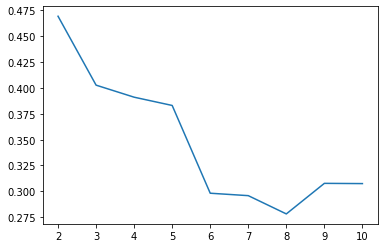

In [116]:
# 1.Silhouette score Analysis

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

In [117]:
# silhouette analysis to check the silhouette score


for i in (2,11):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4692638833968253
For n_clusters=11, the silhouette score is 0.2821409889529375


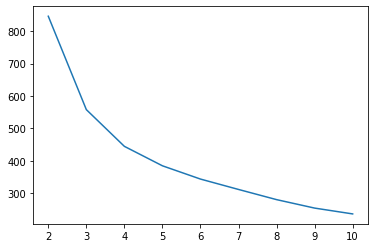

In [118]:
# 2.Elbow-curve/Sum of squared distance(km)

km = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    km.append([k, kmean.inertia_])
    
temp = pd.DataFrame(km)
plt.plot(temp[0], temp[1])

In [119]:
# From Both Approaches we can infer that we should proceed with K=3
# Final Kmeans Clustering

kmean = KMeans(n_clusters = 3, max_iter=50, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [120]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [121]:
data_df_final['cluster_lables'] = kmean.labels_
data_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0


In [122]:
# Check the count of the 3 Labels

data_df_final['cluster_lables'].value_counts()

0    90
2    48
1    29
Name: cluster_lables, dtype: int64

## Visualizing the clusters
## Now we have to plot the clusters bewteen 3 Columns i.e gdpp , child_mort & income

- So, we will visualize 3 plots for the same


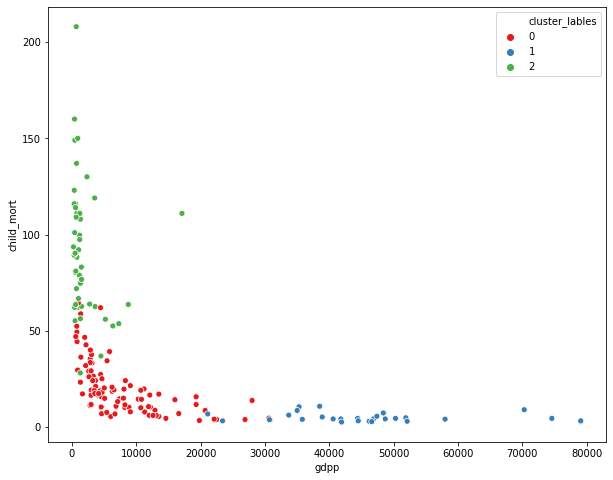

In [123]:
# Plot_1 the cluster
plt.figure(figsize = (10,8))
plot1 = sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_lables', data = data_df_final, palette = 'Set1')

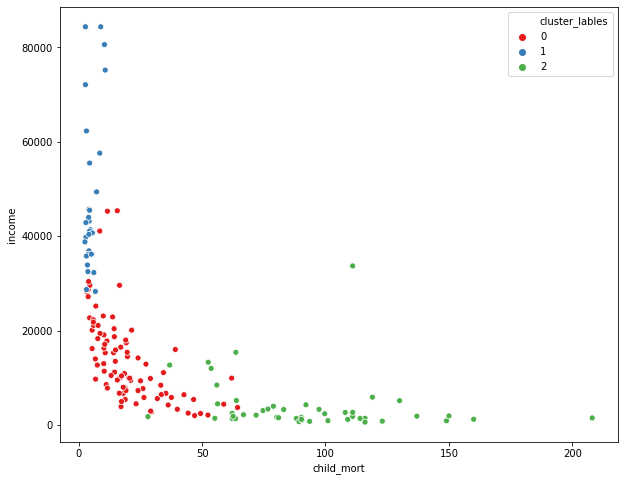

In [124]:
# Plot_2 the cluster
plt.figure(figsize = (10,8))
plot2 = sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_lables', data = data_df_final, palette = 'Set1')

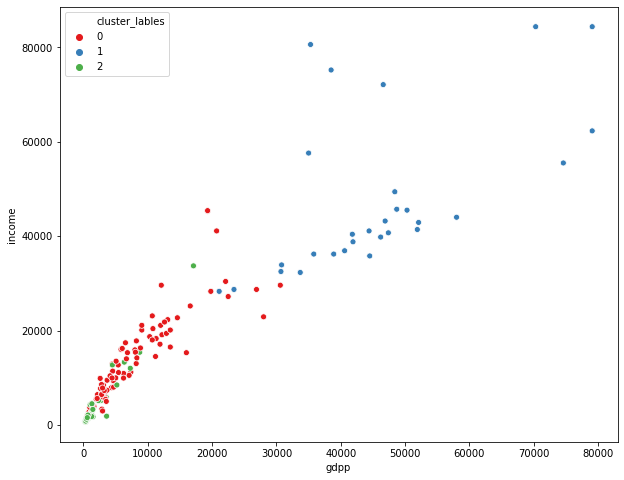

In [125]:
# Plot_3 the cluster
plt.figure(figsize = (10,8))
plot3 = sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_lables', data = data_df_final, palette = 'Set1')

In [126]:
# Checking the DF
data_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0


## Cluster Profiling

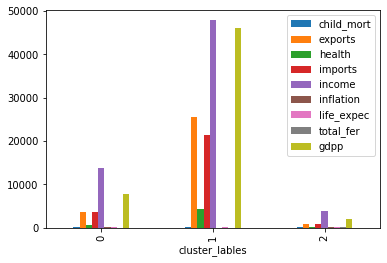

In [127]:
# Making sense out of the clsuters
data_df_final.drop('country', axis = 1).groupby('cluster_lables').mean().plot(kind = 'bar')

In [128]:
# We require only GDP, INCOME AND CHID_MORT from the orginal dataset

cluster_final = data_df_final[['child_mort','income','gdpp','cluster_lables']]
cluster_final.head()

,child_mort,income,gdpp,cluster_lables
0,90.2000,1610,553,2
1,16.6000,9930,4090,0
2,27.3000,12900,4460,0
3,119.0000,5900,3530,2
4,10.3000,19100,12200,0


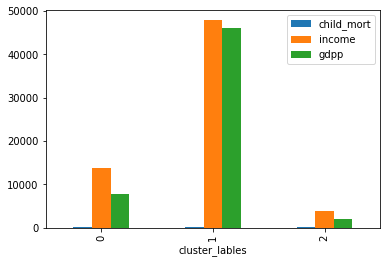

In [129]:
# Making sense out of the clsuters
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

cluster_final.groupby('cluster_lables').mean().plot(kind = 'bar')

In [130]:
# Cluster Label "2" satisfies the condition Low income, Low GDP and High Child_mort

best_cluster = country_df_final[data_df_final['cluster_lables'] == 2]

In [131]:
# The DF that has only variables with cluster_lables = '2'
best_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hierarchical_cluster_lables
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2,0
17,Benin,111.0000,180.4040,31.0780,281.9760,1820,0.8850,61.8000,5.3600,758,2,0
21,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300,8.9200,57.1000,2.8800,6350,2,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430,6.8100,57.9000,5.8700,575,2,0


In [132]:
# Sorting the DF w.r.t Low income, Low GDP and High Child_mort condition.

best_cluster.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hierarchical_cluster_lables
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500,5.4500,32.1000,3.3300,662,2,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220,17.2000,55.0000,5.2000,399,2,0
32,Chad,150.0000,330.0960,40.6341,390.1950,1930,6.3900,56.5000,6.5900,897,2,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446,2,0
97,Mali,137.0000,161.4240,35.2584,248.5080,1870,4.3700,59.5000,6.5500,708,2,0


### We Can infer these 5 countries are more in need of aid:
    1.Haiti
    2.Sierra Leone
    3.Chad
    4.Central African Republic
    5.Mali
    
### By using k-means Clustering we can conlcude these 5 countries are of high priority to get financial aid.
      

## Hierarchical Clustering

In [133]:
# Checking the DF
country_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hierarchical_cluster_lables
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0,1


In [134]:
# Scaled data which we have:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.5696,-0.5650,-0.5987,-0.8517,0.2650,-1.6191,1.9029,-0.7023
1,-0.5389,-0.4739,-0.4392,-0.4136,-0.3869,-0.3721,0.6479,-0.8600,-0.4987
2,-0.2728,-0.4240,-0.4848,-0.4761,-0.2211,1.1221,0.6704,-0.0384,-0.4774
3,2.0078,-0.3812,-0.5324,-0.4640,-0.6120,1.9330,-1.1792,2.1282,-0.5310
4,-0.6956,-0.0867,-0.1788,0.1397,0.1253,-0.7646,0.7043,-0.5419,-0.0320


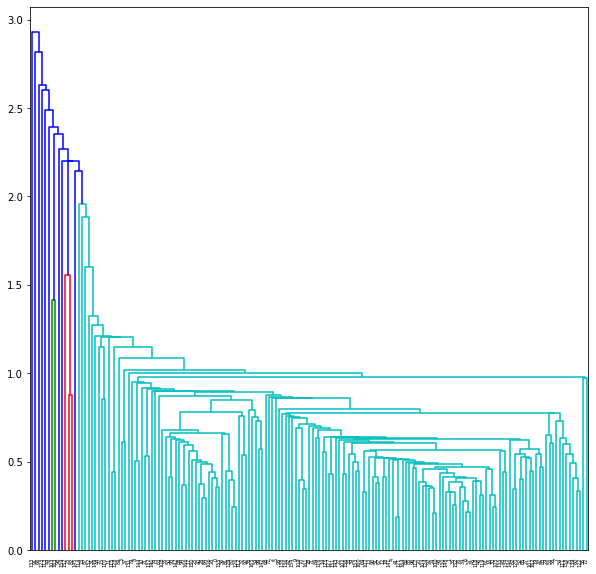

In [138]:
# Single linkage

plt.figure(figsize=(10,10))
mergings = linkage(df1,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

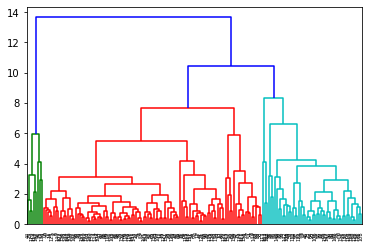

In [139]:
# Complete linkage

mergings = linkage(df1,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [140]:
# Creating cluster_labels

cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [141]:
# Adding Hierarchical cluster labels

data_df_final['Hierarchical_cluster_lables'] = cluster_labels

In [142]:
# Checking the DF

data_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hierarchical_cluster_lables
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0,1
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0,1
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0,1


## Visualizing the clusters using only 3 imp variables : child_mort ,income & gdpp

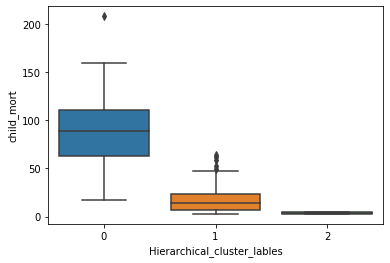

In [143]:
#1st plot with child_mort 
sns.boxplot('Hierarchical_cluster_lables','child_mort',data=data_df_final)


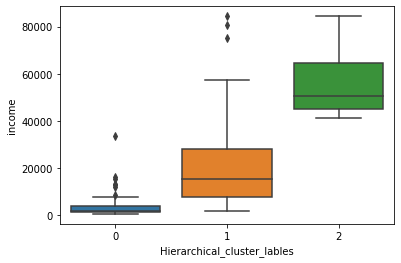

In [144]:
#2nd plot with income
sns.boxplot('Hierarchical_cluster_lables','income',data=data_df_final)

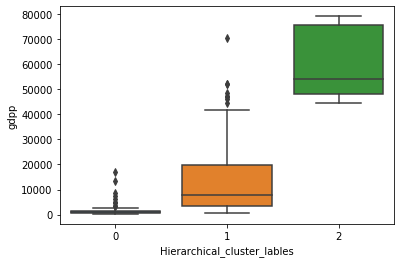

In [145]:
#3rd plot with gdpp
sns.boxplot('Hierarchical_cluster_lables','gdpp',data=data_df_final)

In [146]:
# Creating a DF with only selected variables

cluster_final_2 = data_df_final[['child_mort','income','gdpp','Hierarchical_cluster_lables']]
cluster_final_2.head()

,child_mort,income,gdpp,Hierarchical_cluster_lables
0,90.2000,1610,553,0
1,16.6000,9930,4090,1
2,27.3000,12900,4460,1
3,119.0000,5900,3530,0
4,10.3000,19100,12200,1


## Cluster Profiling for Hierarchical

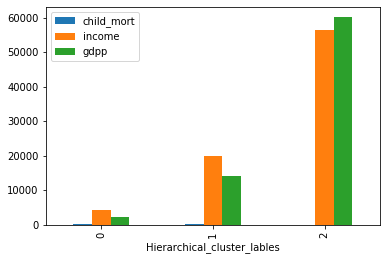

In [147]:
# Making sense out of the clsuters

cluster_final_2.groupby('Hierarchical_cluster_lables').mean().plot(kind = 'bar')

In [148]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter i.e "0"

Hierarchical_best_cluster = data_df_final[data_df_final['Hierarchical_cluster_lables'] == 0]
Hierarchical_best_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hierarchical_cluster_lables
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2,0
17,Benin,111.0000,180.4040,31.0780,281.9760,1820,0.8850,61.8000,5.3600,758,2,0
21,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300,8.9200,57.1000,2.8800,6350,2,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430,6.8100,57.9000,5.8700,575,2,0


In [149]:
# Sorting the DF w.r.t Low income, Low GDP and High Child_mort condition.

Hierarchical_best_cluster.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hierarchical_cluster_lables
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500,5.4500,32.1000,3.3300,662,2,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220,17.2000,55.0000,5.2000,399,2,0
32,Chad,150.0000,330.0960,40.6341,390.1950,1930,6.3900,56.5000,6.5900,897,2,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446,2,0
97,Mali,137.0000,161.4240,35.2584,248.5080,1870,4.3700,59.5000,6.5500,708,2,0


### From the above Analytics it can be seen that the  5 countries  indeed in a need of aid that are:
    1.Haiti
    2.Sierra Leone
    3.Chad
    4.Central African Republic
    5.Mali
    
### With the Help of the Algorithims like kMeans & Hierarchical Clustering we can conlcude these 5 countries must be in the first priority to get Financial AID.
      

# Recomemdation 

I personally suggest to  HELP International to give the first  priority to these 5 countries for providing  with basic amenities, Funds and relief to recover back from  disasters and natural calamities.
 
   

# Conclusion

By following both clustering techniques (Kmean Clustering & Hierarchical Clustering) i have derived the same 5 most priotized countries which need an urgent AID.

The above analysis says easily to proceed with K-means clustering as:
- 1.It efficinet. 
- 2 Dynamic,processing time & speed.
- 3.Less time consuming.
- 4.Less time & space complexity.